In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score

from sklearn.preprocessing  import StandardScaler, LabelEncoder

import torch
import torch.nn as nn

In [2]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

TEST_SIZE = 0.2
ALPHA = 0.001
EPOCHS = 1001

params = {'legend.fontsize': 'medium',
          'figure.figsize' : (15,6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
          }

CMAP = 'coolwarm' # plt.cm.Spectral

plt.rcParams.update(params)

In [3]:
data_df = pd.read_csv('/content/sample_data/wine.csv', header=None)

data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    int64  
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    int64  
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
1,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
2,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
3,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
4,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
5,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
6,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
7,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
8,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
9,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


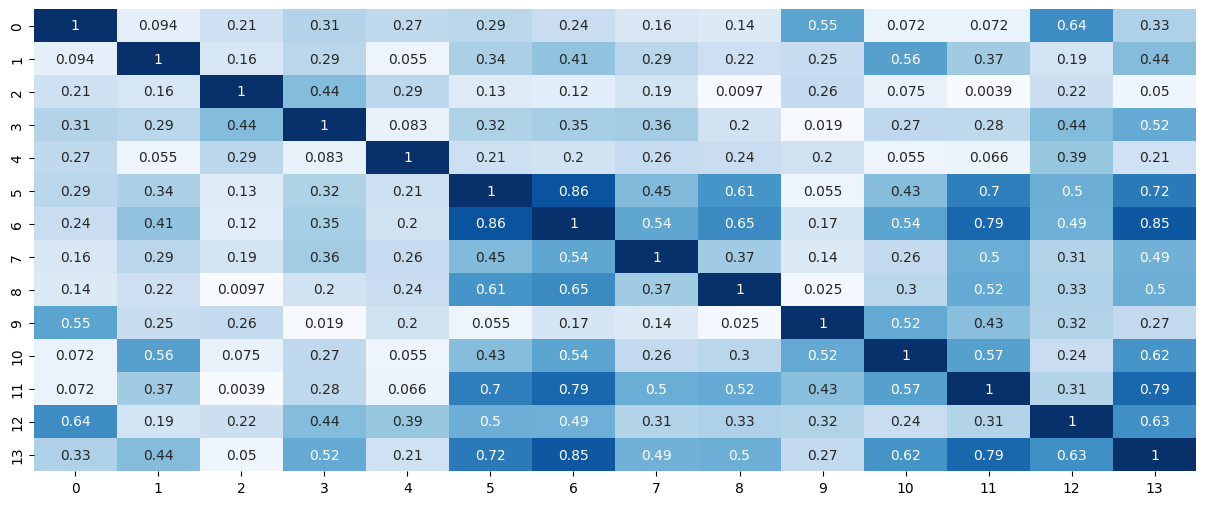

In [6]:
fig, ax = plt.subplots()

sns.heatmap(data_df.corr().abs(), ax = ax, cmap='Blues', annot= True, fmt='.2g', cbar=False);

In [7]:
labels = data_df[data_df.columns[-1]]
features_df = data_df.drop(data_df.columns[-1], axis=1)
features_df.shape, labels.shape

((178, 13), (178,))

Make the model clean and never let out model asume anything on its own. So its always a good option to do encoding. Here we do label encoding.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size=TEST_SIZE, stratify=labels, random_state=RANDOM_STATE)

X_train.shape,X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [10]:
# torch.cuda.is_available()

In [11]:
# torch.version.cuda

In [12]:
# torch.cuda.get_device_name(torch.cuda.current_device())

In [13]:
device = 'cuba' if torch.cuda.is_available() else 'cpu'
device

'cpu'

### MODEL

13-8-3

This model takes the input as a list.

In [14]:
# Sequential Model
# another way to define the model is:

input_dim = X_train.shape[1]

model = nn.Sequential(
    nn.Linear(input_dim, 13),   # first hidden layer
    nn.ReLU(),
    nn.Linear(13, 8) ,     # second hidden layer
    nn.ReLU() ,
    nn.Linear(8, 3)).to(device=device)     # Output Layer

print(model)

Sequential(
  (0): Linear(in_features=13, out_features=13, bias=True)
  (1): ReLU()
  (2): Linear(in_features=13, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=3, bias=True)
)


In [15]:
print(f'Num Parameters  : {len(list(model.parameters()))}')
print(f'Layer 1 Weights : {list(model.parameters())[0].shape}')
print(f'Layer 1 bias    : {list(model.parameters())[1].shape}')
print(f'Layer 2 Weights : {list(model.parameters())[2].shape}')
print(f'Layer 2 bias    : {list(model.parameters())[3].shape}')
print(f'Layer 3 Weights : {list(model.parameters())[4].shape}')
print(f'Layer 3 bias    : {list(model.parameters())[5].shape}')

Num Parameters  : 6
Layer 1 Weights : torch.Size([13, 13])
Layer 1 bias    : torch.Size([13])
Layer 2 Weights : torch.Size([8, 13])
Layer 2 bias    : torch.Size([8])
Layer 3 Weights : torch.Size([3, 8])
Layer 3 bias    : torch.Size([3])


In [16]:
type(X_train)

numpy.ndarray

Here we want tensor and not the np array hence convert to tensor.

In [17]:
train_X = torch.tensor(X_train, dtype=torch.float32, device=device)
test_X = torch.tensor(X_test, dtype=torch.float32, device=device)

train_y = torch.tensor(y_train, dtype=torch.int64, device=device)
test_y = torch.tensor(y_test, dtype=torch.int64, device=device)

In [18]:
train_X.shape, train_y.shape

(torch.Size([142, 13]), torch.Size([142]))

Because we have 4 nodes in the last layer or the output layer, we get 4 values as the output.

In [19]:
pred = model(train_X[:1])
pred = pred.detach().cpu().numpy()

in the above as we get numpy as output so now we can do our operations on the cpu

In [20]:
y_train[0]

np.int64(1)

since the maximum value the model can take is 709 hence we can't take more than 709 value in the neural network.

In [21]:
# Loss Function
loss_fn = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = ALPHA)

In [22]:
# Iteration
# The below code is the training cycle of our model
for epoch in range (EPOCHS):

  model.train()    # set mode to training mode
  predict_prob = model(train_X)
  curr_loss = loss_fn(predict_prob, train_y)

  # Back propagation
  optimizer.zero_grad()
  curr_loss.backward()
  optimizer.step()

In [23]:
pred_prob = model(train_X[:1])
pred_prob.detach().cpu().numpy().argmax()

np.int64(1)

In [24]:
train_y[0].item()

1

In [25]:
# Sequential Model
# another way to define the model is:

del model

model = nn.Sequential(
    nn.Linear(input_dim, 13),   # first hidden layer
    nn.ReLU(),
    nn.Linear(13, 8) ,     # second hidden layer
    nn.ReLU() ,
    nn.Linear(8, 3)).to(device=device)     # Output Layer

print(model)

Sequential(
  (0): Linear(in_features=13, out_features=13, bias=True)
  (1): ReLU()
  (2): Linear(in_features=13, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=3, bias=True)
)


In [26]:
# Loss Function
loss_fn = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = ALPHA)

In [27]:
loss, tloss, n_epoch, acc, tacc = [], [], [], [], []

# Iteration

for epoch in range (EPOCHS):
  model.train()    # set mode to training mode
  predict_prob = model(train_X)
  curr_loss = loss_fn(predict_prob, train_y)

  # Back propagation
  optimizer.zero_grad()
  curr_loss.backward()
  optimizer.step()

  loss.append(curr_loss.data.item())
  _, y_pred = torch.max(predict_prob, 1)

  curr_acc = accuracy_score(y_train, y_pred.cpu().numpy())
  acc.append(curr_acc)

  model.eval()    # Evaluation of Model
  pred_prob_test = model(test_X)
  tcurr_loss = loss_fn(pred_prob_test, test_y)
  tloss.append(tcurr_loss.data.item())

  _, y_pred_tst = torch.max(pred_prob_test, 1)

  tcurr_acc = accuracy_score(y_test, y_pred_tst.cpu().numpy())
  tacc.append(tcurr_acc)
  n_epoch.append(epoch)

  if epoch%100 == 0:
    fmtStr = 'Epoch: {:05d}/{:05d}  --- Loss : {:.5f}/{:.5f} | Acc: {:.5f}/{:.5f}'
    print(fmtStr.format(epoch, EPOCHS, curr_loss.data.item(),
                        tcurr_loss.data.item(), curr_acc, tcurr_acc))

Epoch: 00000/01001  --- Loss : 1.15142/1.15570 | Acc: 0.23239/0.22222
Epoch: 00100/01001  --- Loss : 0.47403/0.46620 | Acc: 0.95070/0.94444
Epoch: 00200/01001  --- Loss : 0.09430/0.10779 | Acc: 1.00000/0.97222
Epoch: 00300/01001  --- Loss : 0.03128/0.04845 | Acc: 1.00000/0.97222
Epoch: 00400/01001  --- Loss : 0.01504/0.03208 | Acc: 1.00000/0.97222
Epoch: 00500/01001  --- Loss : 0.00866/0.02460 | Acc: 1.00000/1.00000
Epoch: 00600/01001  --- Loss : 0.00553/0.01991 | Acc: 1.00000/1.00000
Epoch: 00700/01001  --- Loss : 0.00382/0.01720 | Acc: 1.00000/1.00000
Epoch: 00800/01001  --- Loss : 0.00281/0.01595 | Acc: 1.00000/1.00000
Epoch: 00900/01001  --- Loss : 0.00214/0.01435 | Acc: 1.00000/1.00000
Epoch: 01000/01001  --- Loss : 0.00168/0.01307 | Acc: 1.00000/1.00000


In [28]:
loss_df = pd.DataFrame({'epoch': n_epoch,    'loss': loss , 'test_loss': tloss, 'acc': acc, 'test_acc': tacc})
loss_df.head()

,epoch,loss,test_loss,acc,test_acc
0,0,1.151424,1.155704,0.232394,0.222222
1,1,1.147102,1.151343,0.232394,0.222222
2,2,1.142793,1.147005,0.232394,0.222222
3,3,1.138470,1.142630,0.260563,0.250000
4,4,1.134151,1.138145,0.260563,0.250000


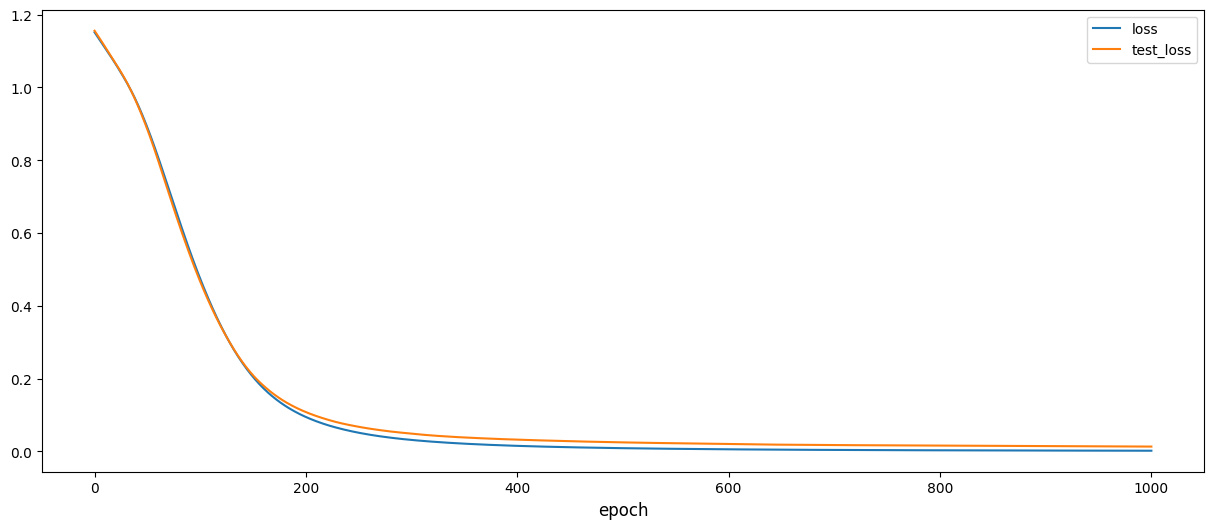

In [29]:
loss_df.plot(x = 'epoch', y=['loss','test_loss']);

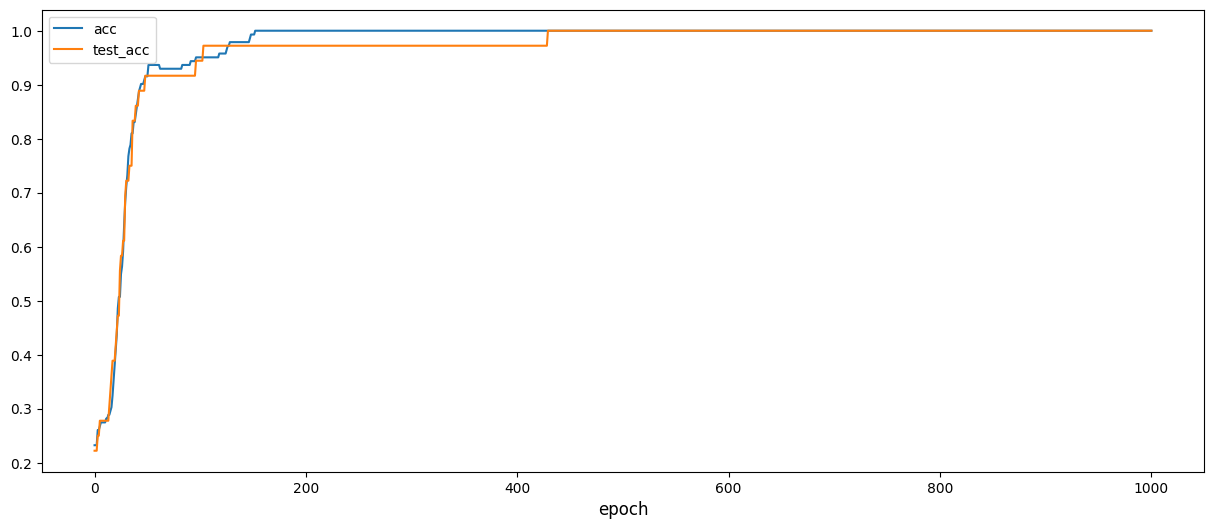

In [30]:
loss_df.plot(x = 'epoch', y=['acc','test_acc']);

<Axes: xlabel='Epochs', ylabel='Acc'>

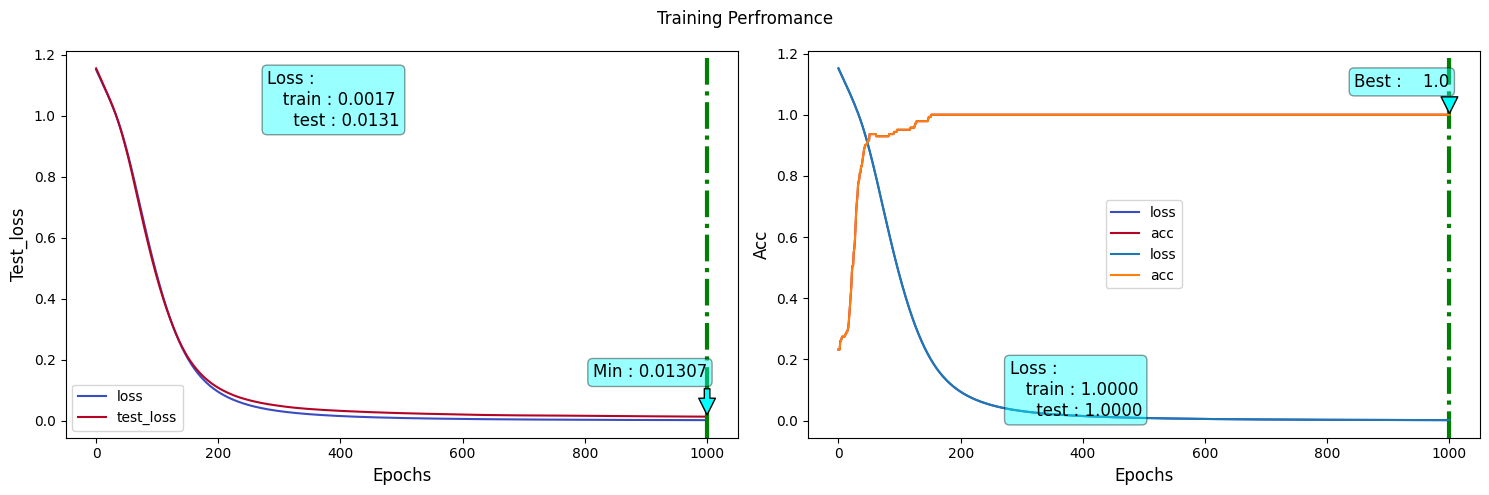

In [31]:
hist_df = loss_df.copy()

fig, axes = plt.subplots(1,2, figsize=(15,5))

x = hist_df.columns[0]
y1 = hist_df.columns[1]   # loss cols
y2 = hist_df.columns[2]   # loss cols
y3 = hist_df.columns[3]   # acc cols
y4 = hist_df.columns[4]   # acc cols

best = hist_df[hist_df[y2] == hist_df[y2].min()]

props = dict(boxstyle = 'round', facecolor = 'aqua', alpha = 0.4)
facecolor = 'cyan'
fontsize = 12
CMAP = plt.cm.coolwarm

# Code for the loss

ax = axes[0]
hist_df.plot(y=[y1,y2], ax=ax, colormap = CMAP)

txtFmt = 'Loss : \n   train : {:6.4f}\n     test : {:6.4f}'
txtstr = txtFmt.format(hist_df.iloc[-1][y1], hist_df.iloc[-1][y2])

ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize, verticalalignment='top', bbox = props)

# Offset for the Arrows
y_min = min(hist_df[y1].min(), hist_df[y2].min())
y_max = max(hist_df[y1].max(), hist_df[y2].max())
offset = (y_max - y_min)/10.0

ax.annotate(f'Min : {best[y2].to_numpy()[0]:6.4}',    # text to print
            xy = (best.index.to_numpy(), best[y2].to_numpy()[0]),  # start
            xytext = (best.index.to_numpy(), best[y2].to_numpy()[0] + offset),
            fontsize = fontsize, va='bottom', ha = 'right', bbox= props,
            arrowprops = dict(facecolor = facecolor, shrink = 0.05))

ax.axvline(best.index.to_numpy()[0], color = 'g', linestyle = '-.', lw = 3)
ax.set_xlabel('Epochs')
ax.set_ylabel(y2.capitalize())


# Code for the accuracy
ax = axes[1]
hist_df.plot(y=[y1,y3], ax=ax, colormap = CMAP)
txtFmt = 'Loss : \n   train : {:6.4f}\n     test : {:6.4f}'
txtstr = txtFmt.format(hist_df.iloc[-1][y3], hist_df.iloc[-1][y4])

ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize, verticalalignment='top', bbox = props)

# Offset for the Arrows
y_min = min(hist_df[y3].min(), hist_df[y4].min())
y_max = max(hist_df[y3].max(), hist_df[y4].max())
offset = (y_max - y_min)/10.0

ax.annotate(f'Best : {best[y4].to_numpy()[0]:6.4}',    # text to print
            xy = (best.index.to_numpy(), best[y4].to_numpy()[0]),  # start
            xytext = (best.index.to_numpy(), best[y4].to_numpy()[0] + offset),
            fontsize = fontsize, va='bottom', ha = 'right', bbox= props,
            arrowprops = dict(facecolor = facecolor, shrink = 0.05))

ax.axvline(best.index.to_numpy(), color = 'g', linestyle = '-.', lw = 3)
ax.set_xlabel('Epochs')
ax.set_ylabel(y3.capitalize())

ax.grid()
plt.suptitle('Training Perfromance')
plt.tight_layout()
ax = axes[1]
# hist_df.plot(y=[y2,y4], ax=axes[0])
hist_df.plot(y=[y1,y3], ax=ax)

In [32]:
best

,epoch,loss,test_loss,acc,test_acc
1000,1000,0.001681,0.013069,1.0,1.0


Train Predictions

In [33]:
outputs = model(train_X)
y_pred = torch.argmax(outputs, dim=1).cpu().numpy()
print(f'Accuracy :{accuracy_score(y_train, y_pred):6.4f}')

Accuracy :1.0000


In [34]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



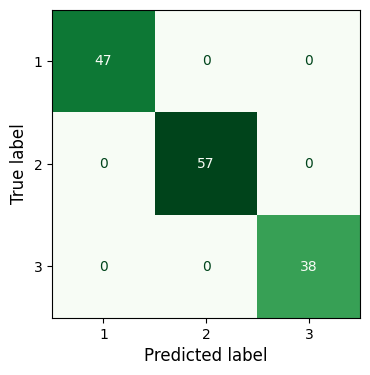

In [35]:
display_labels = [1,2,3]

cm = confusion_matrix(y_train, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= display_labels)

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax = ax, cmap = 'Greens', colorbar=False)